<a href="https://colab.research.google.com/github/MohitGupta2021/ml/blob/main/support_vector_machines_for_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
from sklearn.datasets import load_iris
X,y=load_iris(return_X_y=True,as_frame=True)

In [44]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [45]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [46]:
y.unique()

array([0, 1, 2])

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)


In [48]:
len(X_test)

30

In [49]:
len(X_train)

120

In [50]:
y_train.value_counts()

0    42
2    39
1    39
Name: target, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6a83748250>,
      dtype=object)

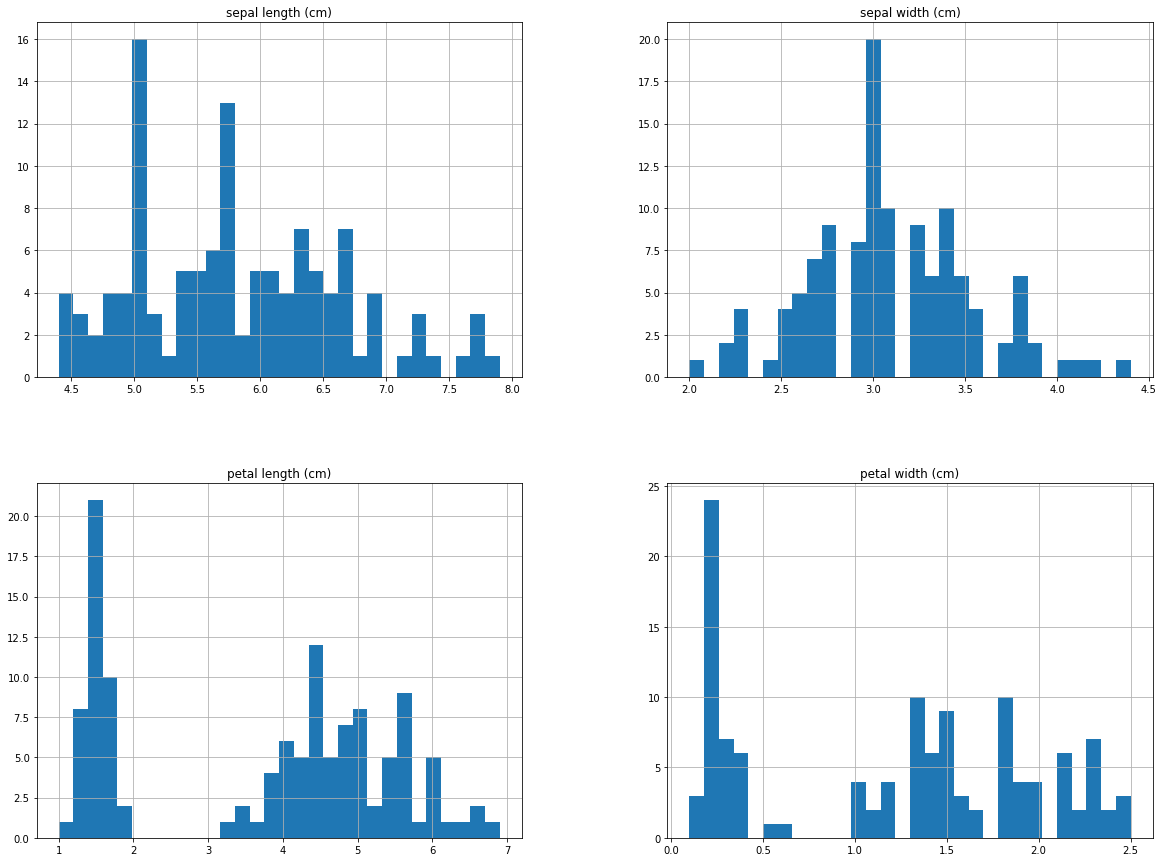

In [51]:
X_train.hist(bins=30,figsize=(20,15))

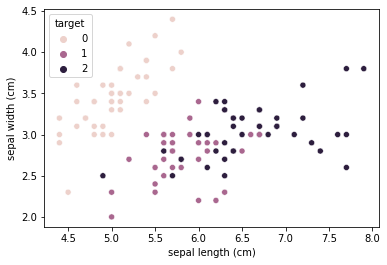

In [52]:
sns.scatterplot(data=X_train,x='sepal length (cm)',y='sepal width (cm)',hue=y_train)

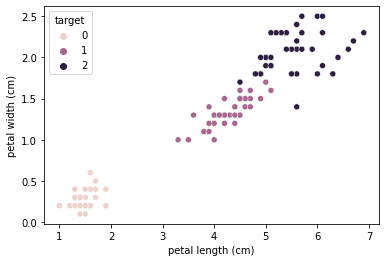

In [53]:
sns.scatterplot(data=X_train,x='petal length (cm)',y='petal width (cm)',hue=y_train)

In [54]:
X_train.describe

<bound method NDFrame.describe of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
95                 5.7               3.0                4.2               1.2
88                 5.6               3.0                4.1               1.3
0                  5.1               3.5                1.4               0.2
46                 5.1               3.8                1.6               0.2
11                 4.8               3.4                1.6               0.2
..                 ...               ...                ...               ...
22                 4.6               3.6                1.0               0.2
75                 6.6               3.0                4.4               1.4
137                6.4               3.1                5.5               1.8
15                 5.7               4.4                1.5               0.4
99                 5.7               2.8                4.1               1.3

[120 rows x 4 columns]>

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
scale_pipe=Pipeline([('scaler',MinMaxScaler())])
X_train_scaled=scale_pipe.fit_transform(X_train)

In [56]:
from sklearn.svm import LinearSVC,SVC
lin_svc=LinearSVC()
lin_svc.fit(X_train_scaled,y_train)

LinearSVC()

In [57]:
poly_svc=SVC(kernel='poly')
poly_svc.fit(X_train_scaled,y_train)

SVC(kernel='poly')

In [58]:
from sklearn.metrics import accuracy_score
lin_pred=lin_svc.predict(X_train_scaled)
accuracy_score(y_train,lin_pred)

0.95

In [59]:
poly_pred=poly_svc.predict(X_train_scaled)
accuracy_score(y_train,poly_pred)

0.9833333333333333

In [60]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_train,poly_pred)

array([[42,  0,  0],
       [ 0, 37,  2],
       [ 0,  0, 39]])

In [61]:
classification_report(y_train,poly_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        42\n           1       1.00      0.95      0.97        39\n           2       0.95      1.00      0.97        39\n\n    accuracy                           0.98       120\n   macro avg       0.98      0.98      0.98       120\nweighted avg       0.98      0.98      0.98       120\n'

In [75]:
from sklearn.model_selection import GridSearchCV

params_grid = {'C':[0.001,10,100,1000],
              'gamma':[1,0.1,0.01,0.001], 
                'degree':[2,3,4,5],
              'coef0':[0,1,2,4]
              
              }

#grid_search = GridSearchCV(estimator=SVC('poly'),params_grid, verbose=2)
grid_search = GridSearchCV(SVC(),params_grid, verbose=2, cv=3)


grid_search.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 256 candidates, totalling 768 fits
[CV] END ................C=0.001, coef0=0, degree=2, gamma=1; total time=   0.0s
[CV] END ................C=0.001, coef0=0, degree=2, gamma=1; total time=   0.0s
[CV] END ................C=0.001, coef0=0, degree=2, gamma=1; total time=   0.0s
[CV] END ..............C=0.001, coef0=0, degree=2, gamma=0.1; total time=   0.0s
[CV] END ..............C=0.001, coef0=0, degree=2, gamma=0.1; total time=   0.0s
[CV] END ..............C=0.001, coef0=0, degree=2, gamma=0.1; total time=   0.0s
[CV] END .............C=0.001, coef0=0, degree=2, gamma=0.01; total time=   0.0s
[CV] END .............C=0.001, coef0=0, degree=2, gamma=0.01; total time=   0.0s
[CV] END .............C=0.001, coef0=0, degree=2, gamma=0.01; total time=   0.0s
[CV] END ............C=0.001, coef0=0, degree=2, gamma=0.001; total time=   0.0s
[CV] END ............C=0.001, coef0=0, degree=2, gamma=0.001; total time=   0.0s
[CV] END ............C=0.001, coef0=0, degree=

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.001, 10, 100, 1000], 'coef0': [0, 1, 2, 4],
                         'degree': [2, 3, 4, 5],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [79]:
grid_search.best_params_

{'C': 10, 'coef0': 0, 'degree': 2, 'gamma': 1}

In [81]:
poly_best=grid_search.best_estimator_.fit(X_train_scaled,y_train)

In [82]:
grid_pred=poly_best.predict(X_train_scaled)

In [83]:
accuracy_score(y_train,grid_pred)

0.9833333333333333

In [84]:
confusion_matrix(y_train,grid_pred)

array([[42,  0,  0],
       [ 0, 37,  2],
       [ 0,  0, 39]])

In [85]:
classification_report(y_train,grid_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        42\n           1       1.00      0.95      0.97        39\n           2       0.95      1.00      0.97        39\n\n    accuracy                           0.98       120\n   macro avg       0.98      0.98      0.98       120\nweighted avg       0.98      0.98      0.98       120\n'

In [86]:
test_scaled=scale_pipe.transform(X_test)

In [87]:
test_pred=poly_best.predict(test_scaled)

In [89]:
accuracy_score(y_test, test_pred)

0.9666666666666667

In [91]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.92      1.00      0.96        11
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

